In [1]:
!pwd
import sys

%reload_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext lab_black
sys.executable

/c/Users/81908/jupyter_notebook/pytorch_lightning_work/kaggle_Cassava/notebook/cleanlab_test/20210202


'C:\\Users\\81908\\Anaconda3\\envs\\lightning\\python.exe'

In [2]:
import os

gcp_path = os.getcwd()
gcp_path = ""
# gcp_path

In [3]:
device = None

## for TPU
## https://www.kaggle.com/abhinand05/vision-transformer-vit-tutorial-baseline
# import os
# if os.path.exists("./torchvision-1.7-cp37-cp37m-linux_x86_64.whl") == False:
#    !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
#    !python pytorch-xla-env-setup.py --version 1.7
# import torch_xla
# import torch_xla.core.xla_model as xm
# import torch_xla.distributed.xla_multiprocessing as xmp
# import torch_xla.distributed.parallel_loader as pl
# device = xm.xla_device()
# num_workers = 2  # os.cpu_count()  # 4

# for GPU
if device is None:
    import os
    import torch

    device = "cuda" if torch.cuda.is_available() else "cpu"

    if os.getcwd() in ["/kaggle/working", "/content"]:
        num_workers = os.cpu_count()  # 4
    else:
        num_workers = 0

print("device:", device)

device: cuda


In [4]:
import os, sys

if os.getcwd() in ["/kaggle/working", "/content"]:
    !pip install "../input/pytorchlightning110/pytorch_lightning-1.1.0-py3-none-any.whl"
    !pip install pytorch-gradcam
    !pip install torch_optimizer
    !pip install adabelief-pytorch==0.1.0
    from gradcam import GradCAM, GradCAMpp
    import torch_optimizer
    from adabelief_pytorch import AdaBelief

elif os.getcwd() == gcp_path:
    pass

else:
    # sys.path.append(r"C:\Users\81908\Git\Adabelief-Optimizer\pypi_packages\adabelief_pytorch0.1.0")
    # from adabelief_pytorch import AdaBelief
    # sys.path.append(r"C:\Users\81908\Git\gradcam_plus_plus-pytorch")
    # from gradcam import GradCAM, GradCAMpp
    pass

In [5]:
import sys

if os.getcwd() in ["/kaggle/working", "/content"]:
    sys.path.append("../input/pytorch-image-models/pytorch-image-models-master")
import timm

print("timm version:", timm.__version__)

timm version: 0.3.2


In [6]:
# https://rwightman.github.io/pytorch-image-models/
import timm
from pprint import pprint

model_names = timm.list_models(pretrained=True)
pprint(model_names)

# imagenetの精度一覧
# https://sotabench.com/user/rwightman/repos/rwightman/pytorch-image-models

['adv_inception_v3',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn107',
 'dpn131',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnetlight',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b3a',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_lite0',
 'ens_adv_inception_resnet_v2',
 'ese_vovnet19b_dw',
 'ese_vovnet39b',
 'fbnetc_100',
 'gluon_inception_v3',
 'gluon_resnet18_v1b',
 'gluon_resnet34_v1b',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'gluon_resn

In [7]:
import os, sys

if os.getcwd() in ["/kaggle/working", "/content"]:
    sys.path.append("../input/cleanlab/")
import cleanlab
from cleanlab.classification import LearningWithNoisyLabels

print("cleanlab version:", cleanlab.__version__)

cleanlab version: 0.1.1


In [8]:
import os, sys

if os.getcwd() in ["/kaggle/working", "/content"]:
    if not os.path.exists("./kaggle_Cassava"):
        !git clone https://github.com/riron1206/kaggle_Cassava.git
    sys.path.append("./kaggle_Cassava/code")

elif os.getcwd() == gcp_path:
    sys.path.append("../kaggle_Cassava/code")

elif "shingo" in os.getcwd():
    sys.path.append(
        r"C:\Users\shingo\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\kaggle_Cassava\code"
    )
else:
    sys.path.append(r"C:\Users\81908\MyGitHub\kaggle_Cassava\code")

from gem_pooling import GeM, GeMNet
from bi_tempered_loss import BiTemperedLoss
from focal_ce_loss import FocalLossWithOutOneHot
from smooth_ce_loss import SmoothCrossEntropyLoss
from symmetric_ce_loss import SymmetricCrossEntropyLoss
from mix_aug import cutmix, fmix, snapmix, SnapMixLoss
from sampling import (
    minor_class_over_sample,
    imblearn_over_sampling,
    imblearn_under_sampling,
)
from my_lr_scheduler import _CosineAnnealingWarmupRestarts
from balanced_batch_sampler import BalancedBatchSampler

# from gradcam_util import GradcamUtil
from util_torch import freeze_until, freeze_bn
from visualize import visualize_transpose, show_images, show_pred_diff_images
from sharpen import sharpen
from dataset_normalize_param import dataset_normalize_param
from deit_models import (
    deit_base_patch16_224,
    deit_base_patch16_384,
    deit_base_distilled_patch16_384,
)

In [9]:
import os
import random
import torch


def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [10]:
# https://www.kaggle.com/mekhdigakhramanian/pytorch-efficientnet-baseline-inference-tta/data?select=tf_efficientnet_b3_ns_fold_0_0
import torch
import numpy as np


def inference_one_epoch(model, data_loader, device):
    model.eval()
    y_hat_all = []
    y_hat_all2 = []
    with torch.no_grad():
        for step, batch in enumerate(data_loader):
            imgs = batch["x"].to(device).float()
            model = model.to(device)
            y_hat, y_hat2 = model(imgs)  # ノイズの予測有り
            y_hat_all += [torch.softmax(y_hat, 1).detach().cpu().numpy()]
            y_hat_all2 += [torch.softmax(y_hat2, 1).detach().cpu().numpy()]
    y_hat_all = np.concatenate(y_hat_all, axis=0)
    y_hat_all2 = np.concatenate(y_hat_all2, axis=0)
    # print(y_hat_all.shape, y_hat_all2.shape)
    return np.hstack((y_hat_all, y_hat_all2))

In [11]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss
from colorama import Fore

r_ = Fore.RED
b_ = Fore.BLUE
y_ = Fore.YELLOW


def check_oof(y, Y_oof, suff=""):
    oof = accuracy_score(y, Y_oof.values.argmax(1))
    oof_loss = log_loss(y, Y_oof.values)
    print(y_, f"oof{suff}:", round(oof, 4))
    print(y_, f"oof_loss{suff}:", round(oof_loss, 4))
    return oof, oof_loss

In [12]:
import os
import cv2
import glob
import random
import shutil
import pickle
import json
import yaml
import pathlib
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset
from torch.cuda import amp

import torchvision
from torchvision import models

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
from collections import defaultdict
import albumentations as A
from albumentations.pytorch import ToTensorV2

import timm

import wandb

import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.metrics.functional import accuracy
from pytorch_lightning.loggers.wandb import WandbLogger

import warnings

warnings.filterwarnings("ignore")

print("pytorch_lightning version:", pl.__version__)

pytorch_lightning version: 1.1.0


In [13]:
import os, shutil

if os.path.exists("lightning_logs/"):
    shutil.rmtree("lightning_logs/")
    os.mkdir("lightning_logs/")
if os.path.exists("wandb/"):
    shutil.rmtree("wandb/")

# Dataset, Lightning Data Module

In [14]:
class CassavaDataset(Dataset):
    def __init__(
        self,
        df: pd.DataFrame,
        train: bool = True,
        transforms=None,
    ):
        self.df = df
        self.train = train
        self.transforms = transforms

    def __getitem__(self, index):
        im_path = self.df.iloc[index]["file_path"]
        x = cv2.imread(im_path, cv2.IMREAD_COLOR)
        x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

        if self.transforms:
            x = self.transforms(image=x)["image"]

        if self.train:
            y = self.df.iloc[index]["label"]
            y_soft = self.df.iloc[index][list(name_mapping.values())].values.astype(
                np.float32
            )
            y2 = self.df.iloc[index]["noise"]  # ノイズかどうかの2値ラベル
            return {"x": x, "y": y, "y2": y2, "y_soft": y_soft, "index": index}
        else:
            return {"x": x}

    def __len__(self):
        return len(self.df)


class CassavaDataModule(pl.LightningDataModule):
    def __init__(
        self,
        train_df,
        valid_df,
        data_transforms,
        CFG,
    ):
        super().__init__()
        self.train_df = train_df
        self.valid_df = valid_df
        self.data_transforms = data_transforms
        self.CFG = CFG

    def prepare_data(self):
        pass

    def setup(self, stage=None):
        self.train_dataset = CassavaDataset(
            self.train_df,
            train=True,
            transforms=self.data_transforms["train"],
        )

        self.valid_dataset = CassavaDataset(
            self.valid_df,
            train=True,
            transforms=self.data_transforms["valid"],
        )

        self.valid_tta_dataset = CassavaDataset(
            self.valid_df,
            train=True,
            transforms=self.data_transforms["test"],
        )  # test setのTTA条件

    def train_dataloader(self):
        if self.CFG.is_balanced_batch:
            assert (
                self.CFG.batch_size % self.CFG.n_classes == 0
            ), "batch_sizeはクラス数の整数倍にしないとダメ！！！"

            balanced_batch_sampler = BalancedBatchSampler(
                self.train_dataset, self.train_df["label"].values
            )

            train_loader = DataLoader(
                self.train_dataset,
                batch_size=self.CFG.batch_size,
                num_workers=self.CFG.num_workers,
                drop_last=True,
                sampler=balanced_batch_sampler,
            )
        else:
            train_loader = DataLoader(
                self.train_dataset,
                batch_size=self.CFG.batch_size,
                num_workers=self.CFG.num_workers,
                drop_last=True,
                shuffle=True,
            )

        return train_loader

    def val_dataloader(self):
        return DataLoader(
            self.valid_dataset,
            batch_size=self.CFG.batch_size,
            num_workers=self.CFG.num_workers,
            shuffle=False,
        )

    def val_tta_dataloader(self):
        return DataLoader(
            self.valid_tta_dataset,
            batch_size=self.CFG.batch_size,
            num_workers=self.CFG.num_workers,
            shuffle=False,
        )

# LightningModule

In [15]:
class Classifier(pl.LightningModule):
    """for 2output multi task"""

    def __init__(self, in_features):
        super().__init__()
        self.classifier1 = nn.Linear(in_features, 5)
        self.classifier2 = nn.Linear(in_features, 2)

    def forward(self, x):
        x1 = self.classifier1(x)
        x2 = self.classifier2(x)
        return x1, x2


class CassavaLite(pl.LightningModule):
    def __init__(self):
        super().__init__()

        self.use_amp = True  # apex amp を有効にする(16-bit mixed precision) https://pytorch-lightning.readthedocs.io/en/stable/lightning_module.html

        if "RepVGG" in CFG.arch:
            if CFG.arch == "RepVGG_B3":
                self.net = create_RepVGG_B3(deploy=CFG.RepVGG_deploy)

                if CFG.pretrained:
                    pth = (
                        "../input/repvggpretrainedweights/RepVGG-B3-200epochs-train.pth"
                    )
                    self.net.load_state_dict(torch.load(pth))
                    print(f"load {pth}")

                self.net.linear = Classifier(self.net.linear.in_features)

        elif "deit" in CFG.arch:
            if CFG.pretrained:
                self.net = torch.hub.load(
                    "facebookresearch/deit:main",
                    CFG.arch,
                    # "deit_base_patch16_224",
                    pretrained=CFG.pretrained,
                )  # pretrained=Falseでも使うにはnet環境必要
            else:
                if CFG.arch == "deit_base_patch16_224":
                    self.net = deit_base_patch16_224(
                        pretrained=False
                    )  # pretrained=True にすると失敗する。。。
                elif CFG.arch == "deit_base_patch16_384":
                    self.net = deit_base_patch16_384(pretrained=False)
                elif CFG.arch == "deit_base_distilled_patch16_384":
                    self.net = deit_base_distilled_patch16_384(pretrained=False)

            self.net.head = Classifier(self.net.head.in_features)

        else:
            self.net = timm.create_model(CFG.arch, pretrained=True)

            if CFG.model_path is not None:
                # 学習済みモデルファイル指定ある場合ロード
                self.net.load_state_dict(torch.load(CFG.model_path))
                print("load pth:", CFG.model_path)

            if "eff" in CFG.arch:
                self.net.classifier = Classifier(self.net.classifier.in_features)
            elif "rexnet" in CFG.arch:
                self.net.head.fc = Classifier(self.net.head.fc.in_features)
            elif "vit" in CFG.arch:
                self.net.head = Classifier(self.net.head.in_features)
            else:
                self.net.fc = Classifier(self.net.fc.in_features)

    def forward(self, x):
        return self.net(x)

    def configure_optimizers(self):
        param_groups = self.parameters()

        if CFG.opt == "adam":
            optimizer = torch.optim.Adam(
                param_groups,
                lr=CFG.lr,
                weight_decay=CFG.weight_decay,
                amsgrad=False,
            )
        elif CFG.opt == "adabelief":
            optimizer = AdaBelief(
                param_groups, lr=CFG.lr, weight_decay=CFG.weight_decay
            )
        elif CFG.opt == "radam":
            optimizer = torch_optimizer.RAdam(
                param_groups, lr=CFG.lr, weight_decay=CFG.weight_decay
            )
        else:
            optimizer = torch.optim.AdamW(
                param_groups, lr=CFG.lr, weight_decay=CFG.weight_decay
            )

        if CFG.lr_scheduler == "CosineAnnealingLR":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
                optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr
            )
        elif CFG.lr_scheduler == "CosineAnnealingWarmRestarts":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
                optimizer, T_0=CFG.T_max, T_mult=1, eta_min=CFG.min_lr
            )
        elif CFG.lr_scheduler == "CosineAnnealingWarmUpRestarts":
            scheduler = _CosineAnnealingWarmupRestarts(
                optimizer,
                first_cycle_steps=CFG.max_epochs,
                max_lr=CFG.lr,
                min_lr=CFG.min_lr,
                warmup_steps=1,
            )
        else:
            scheduler = torch.optim.lr_scheduler.StepLR(
                optimizer, step_size=2, gamma=0.1
            )

        return [optimizer], [scheduler]

    def loss(self, y_hat, y, mix_decision):
        if CFG.train_loss_name == "SmoothCrossEntropyLoss":
            loss_fn = SmoothCrossEntropyLoss(smoothing=CFG.smoothing).to(CFG.device)
        elif CFG.train_loss_name == "FocalLoss":
            loss_fn = FocalLossWithOutOneHot(gamma=CFG.gamma).to(CFG.device)
        elif CFG.train_loss_name == "FocalCosineLoss":
            loss_fn = FocalCosineLoss(smoothing=CFG.smoothing).to(CFG.device)
        elif CFG.train_loss_name == "BiTemperedLoss":
            # labelsmoothing と mix_aug を半々にする
            # https://www.kaggle.com/c/cassava-leaf-disease-classification/discussion/209065
            if mix_decision < CFG.mix_decision_th:
                loss_fn = BiTemperedLoss(t1=CFG.t1, t2=CFG.t2, smoothing=0.0).to(
                    CFG.device
                )
            else:
                loss_fn = BiTemperedLoss(
                    t1=CFG.t1, t2=CFG.t2, smoothing=CFG.smoothing
                ).to(CFG.device)
        elif CFG.train_loss_name == "SymmetricCrossEntropyLoss":
            if mix_decision < CFG.mix_decision_th:
                loss_fn = SymmetricCrossEntropyLoss(
                    num_classes=CFG.n_classes,
                    alpha=CFG.symmetric_alpha,
                    beta=CFG.symmetric_beta,
                    smoothing=0.0,
                ).to(CFG.device)
            else:
                loss_fn = SymmetricCrossEntropyLoss(
                    num_classes=CFG.n_classes,
                    alpha=CFG.symmetric_alpha,
                    beta=CFG.symmetric_beta,
                    smoothing=CFG.smoothing,
                ).to(CFG.device)
        elif CFG.train_loss_name == "ElrLoss":
            loss_fn = ElrLoss(num_classes=CFG.n_classes).to(CFG.device)
        else:
            loss_fn = nn.CrossEntropyLoss().to(CFG.device)

        # BiTemperedLoss, SymmetricCrossEntropyLoss はソフトラベル可能
        return loss_fn(y_hat, y)

    def training_step(self, batch, batch_idx):
        x, y, y2, y_soft, index = (
            batch["x"],
            batch["y"].long(),
            batch["y2"].long(),
            batch["y_soft"],
            batch["index"].detach().cpu().numpy(),
        )
        # print(index, ordered_label_errors)

        # -------- 画像表示 --------
        if DEBUG:
            try:
                fig = plt.figure(figsize=(16, 16))
                for i in range(5):
                    print("y:", y[i])
                    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
                    im = x[i].to("cpu").numpy().transpose(1, 2, 0)
                    plt.imshow(im)
                plt.show()
                plt.clf()
                plt.close()
            except:
                pass
        # -------------------------

        ######## 前半のepoch数はbn固定する ########
        # https://www.kaggle.com/yingpengchen/pytorch-cldc-train-with-vit
        if self.current_epoch < CFG.freeze_bn_epochs:
            freeze_bn(self.net)
            # print(f"### epoch {self.current_epoch}: bn freeze ###")
        ##########################################

        ######## 後半のepoch数はmix augなしにする ########
        if self.current_epoch < CFG.max_epochs - 5:

            # cutmix/fmix/snapmixの発生乱数
            mix_decision = np.random.rand()

            # 乱数がしきい値以下orノイズありバッチならmix aug
            if (
                mix_decision
                < CFG.mix_decision_th
                # or len(np.intersect1d(index, ordered_label_errors)) > 0
            ):

                if CFG.mixmethod == "cutmix":
                    # print("intersect1d index:", len(np.intersect1d(index, ordered_label_errors)))
                    x, y_mixs = cutmix(x, y.long(), CFG.mix_alpha)
                    y_hat, y_hat2 = self(x.float())
                    loss = self.loss(y_hat, y_mixs[0], mix_decision) * y_mixs[
                        2
                    ] + self.loss(y_hat, y_mixs[1], mix_decision) * (1.0 - y_mixs[2])

                elif CFG.mixmethod == "resizemix":
                    # print("intersect1d index:", len(np.intersect1d(index, ordered_label_errors)))
                    x, y_mixs = resizemix(x, y.long(), CFG.mix_alpha)
                    y_hat, y_hat2 = self(x.float())
                    loss = self.loss(y_hat, y_mixs[0], mix_decision) * y_mixs[
                        2
                    ] + self.loss(y_hat, y_mixs[1], mix_decision) * (1.0 - y_mixs[2])

                elif CFG.mixmethod == "fmix":
                    x, y_mixs = fmix(
                        x,
                        y.long(),
                        alpha=CFG.mix_alpha,
                        decay_power=5.0,
                        shape=(CFG.height, CFG.width),
                    )
                    y_hat, y_hat2 = self(x.float())
                    loss = self.loss(y_hat, y_mixs[0], mix_decision) * y_mixs[
                        2
                    ] + self.loss(y_hat, y_mixs[1], mix_decision) * (1.0 - y_mixs[2])

                # --- 画像表示（cutmix/fmix/snapmix確認用）---
                if DEBUG:
                    try:
                        print("mix_decision:", mix_decision)
                        fig = plt.figure(figsize=(16, 16))
                        for i in range(5):
                            print("y_hat:", y_hat[i])
                            ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
                            im = x[i].to("cpu").numpy().transpose(1, 2, 0)
                            plt.imshow(im)
                        plt.show()
                        plt.clf()
                        plt.close()
                    except:
                        pass
                # -----------------------------------------

            else:
                y_hat, y_hat2 = self(x.float())
                if CFG.is_onehot_label:
                    loss = self.loss(y_hat, y_soft, mix_decision)
                else:
                    loss = self.loss(y_hat, y, mix_decision)

        else:
            y_hat, y_hat2 = self(x.float())
            if CFG.is_onehot_label:
                loss = self.loss(y_hat, y_soft, 1.0)
            else:
                loss = self.loss(y_hat, y, 1.0)

        # loss2 = nn.CrossEntropyLoss()(y_hat2, y2).to(CFG.device)
        loss2 = SmoothCrossEntropyLoss(smoothing=CFG.smoothing).to(CFG.device)(
            y_hat2, y2
        )  # ノイズかどうかは確証無いからラベルスムージングしてみる
        loss_all = loss * 0.5 + loss2 * 0.5  # とりあえずこの割合でいく

        acc = accuracy(y_hat, y)
        acc2 = accuracy(y_hat2, y2)
        acc_all = acc * 0.5 + acc2 * 0.5  # とりあえずこの割合でいく

        # on_epoch=Tureでepoch単位の平均値を記録する
        # logger=Trueでtensorboardやwandbに記録する
        self.log(
            "train_loss", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True
        )
        self.log(
            "train_loss_noise",
            loss2,
            on_step=False,
            on_epoch=True,
            prog_bar=True,
            logger=True,
        )
        self.log(
            "train_acc", acc, on_step=False, on_epoch=True, prog_bar=True, logger=True
        )
        self.log(
            "train_acc_noise",
            acc2,
            on_step=False,
            on_epoch=True,
            prog_bar=True,
            logger=True,
        )
        return {"loss": loss_all, "acc": acc_all}

    def validation_step(self, batch, batch_idx):
        x, y, y2, y_soft, _ = (
            batch["x"],
            batch["y"].long(),
            batch["y2"].long(),
            batch["y_soft"],
            batch["index"],
        )
        y_hat, y_hat2 = self(x)
        loss = nn.CrossEntropyLoss()(y_hat, y).to(CFG.device)
        loss2 = nn.CrossEntropyLoss()(y_hat2, y2).to(CFG.device)
        loss_all = loss * 0.5 + loss2 * 0.5  # とりあえずこの割合でいく
        acc = accuracy(y_hat, y)
        acc2 = accuracy(y_hat2, y2)
        acc_all = acc * 0.5 + acc2 * 0.5  # とりあえずこの割合でいく
        self.log("val_loss", loss, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_loss_noise", loss2, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_acc", acc, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_acc_noise", acc2, on_epoch=True, prog_bar=True, logger=True)
        return {"val_loss": loss_all, "val_acc": acc_all}

In [16]:
# https://www.kaggle.com/tmhrkt/cassava-cleanlab-with-efficientnet-b0/data
# https://github.com/cgnorthcutt/cleanlab/blob/master/cleanlab/classification.py
from sklearn.base import BaseEstimator


class CleanlabTrainer(BaseEstimator):
    """
    デフォルトのLearningWithNoisyLabels:確信度と正解ラベルから間違ったラベルの可能性が高いサンプルを除いて学習する
    を使うために必要なクラス
    """

    def __init__(self, trainer, pl_model, train_df, valid_df, data_transforms):
        self.trainer = trainer
        self.pl_model = pl_model
        self.train_df = train_df
        self.valid_df = valid_df
        self.data_transforms = data_transforms

    def fit(self, img_idx, _):
        print(f"Cleanlab train len: {self.train_df.shape[0]} -> {len(img_idx)}")
        train_df = self.train_df.loc[img_idx]
        dm = CassavaDataModule(train_df, self.valid_df, data_transforms, CFG)
        self.trainer.fit(self.pl_model, dm)

    def predict(self, img_idx):
        pass

    def predict_proba(self, img_idx):
        pass

    def score(self, img_idx, label, sample_weight=None):
        pass

# Train method

In [17]:
def run_train(df, data_transforms, wandb_logger=None):
    print(f"df.shape:", df.shape)
    print("wandb_logger:", wandb_logger)
    print(f"CFG: {CFG.__dict__}")

    Y_pred = pd.DataFrame(
        np.zeros((df.shape[0], CFG.n_classes + 2)),
        # np.zeros((df.shape[0], 2)),
        columns=[*list(name_mapping.values()), *["clean", "noise"]],  # ノイズ列あり
        index=df.index,
    )
    Y_pred_tta = Y_pred.copy()

    for i in CFG.seeds:
        set_seed(seed=i)
        pl.seed_everything(i)

        cv = StratifiedKFold(n_splits=CFG.n_splits, shuffle=CFG.shuffle, random_state=i)

        for j, (train_idx, valid_idx) in enumerate(cv.split(df, df["label"])):

            if CFG.is_only_first_fold:
                if j > 0:
                    break

            train_df, valid_df = df.iloc[train_idx], df.iloc[valid_idx]

            if CFG.is_over_sample:
                train_df = imblearn_over_sampling(
                    train_df, train_df["label"], random_state=i, is_plot=False
                )
            elif CFG.is_under_sample:
                train_df = imblearn_under_sampling(
                    train_df, train_df["label"], random_state=i, is_plot=False
                )
            elif CFG.n_over > 0:
                # マイナークラスのみover sampling
                train_df = minor_class_over_sample(
                    train_df, n_over=CFG.n_over, is_plot=False
                )

            if CFG.is_old_compe_train:
                # 過去コンペのデータすべてtrainに入れる
                train_df = train_df.append(old_compe_df, ignore_index=True)

            dm = CassavaDataModule(train_df, valid_df, data_transforms, CFG)

            trainer_params = {
                "max_epochs": CFG.max_epochs,
                "deterministic": True,  # cudaの乱数固定
            }
            trainer_params[
                "accumulate_grad_batches"
            ] = CFG.accumulate_grad_batches  # 勾配をnバッチ分溜めてから誤差逆伝播
            early_stopping = EarlyStopping("val_loss", patience=CFG.patience)
            if CFG.monitor == "val_loss":
                model_checkpoint = ModelCheckpoint(
                    monitor="val_loss", save_top_k=1, mode="min"
                )
            else:
                model_checkpoint = ModelCheckpoint(
                    monitor="val_acc", save_top_k=1, mode="max"
                )
            trainer_params["callbacks"] = [model_checkpoint, early_stopping]

            if device == "cuda":
                trainer_params["gpus"] = 1
            if type(device) != str:
                trainer_params["tpu_cores"] = 1  # xm.xrt_world_size()
                trainer_params["precision"] = 16

            if CFG.wandb_project is not None:
                trainer = pl.Trainer(logger=wandb_logger, **trainer_params)
            else:
                trainer = pl.Trainer(**trainer_params)

            if CFG.is_lr_find:
                # 学習率探索
                lr_finder = trainer.tuner.lr_find(CassavaLite(), dm)
                suggested_lr = lr_finder.suggestion()
                fig = lr_finder.plot()
                plt.title(f"suggested_lr: {suggested_lr}")
                fig.show()
                fig.savefig("lr_finder.png")
                break

            elif CFG.is_cleanlab:
                dm.setup()
                clt = CleanlabTrainer(
                    trainer, CassavaLite(), train_df, valid_df, data_transforms
                )
                # デフォルトのLearningWithNoisyLabels:確信度と正解ラベルから間違ったラベルの可能性が高いサンプルを除いて学習する
                lnl = LearningWithNoisyLabels(clf=clt, seed=i, n_jobs=os.cpu_count())
                lnl.fit(train_idx, train_df["label"].values, psx=psx[train_idx])

            else:
                # 学習実行
                trainer.fit(CassavaLite(), dm)

            shutil.copy(
                trainer.checkpoint_callback.best_model_path,
                f"model_seed_{i}_fold_{j}.ckpt",
            )

            # ---------- val predict ---------
            pretrained_model = CassavaLite().load_from_checkpoint(
                trainer.checkpoint_callback.best_model_path
            )
            Y_pred.iloc[valid_idx] += inference_one_epoch(
                pretrained_model, dm.val_dataloader(), device
            )
            # display(Y_pred)
            val_loss = metrics.log_loss(
                valid_df.label.values, Y_pred.iloc[valid_idx, :5]
            )
            val_loss2 = metrics.log_loss(
                valid_df.noise.values, Y_pred.iloc[valid_idx, 5:]
            )
            val_acc = (
                valid_df.label.values
                == np.argmax(Y_pred.iloc[valid_idx, :5].values, axis=1)
            ).mean()
            val_acc2 = (
                valid_df.noise.values
                == np.argmax(Y_pred.iloc[valid_idx, 5:].values, axis=1)
            ).mean()
            print(f"fold {j} validation loss = {val_loss}")
            print(f"fold {j} validation loss noise = {val_loss2}")
            print(f"fold {j} validation accuracy = {val_acc}")
            print(f"fold {j} validation accuracy noise = {val_acc2}\n")

            for _ in range(CFG.n_tta):
                Y_pred_tta.iloc[valid_idx] += (
                    inference_one_epoch(
                        pretrained_model, dm.val_tta_dataloader(), device
                    )
                    / CFG.n_tta
                )
            val_loss_tta = metrics.log_loss(
                valid_df.label.values, Y_pred_tta.iloc[valid_idx, :5]
            )
            val_loss_tta2 = metrics.log_loss(
                valid_df.noise.values, Y_pred_tta.iloc[valid_idx, 5:]
            )
            val_acc_tta = (
                valid_df.label.values
                == np.argmax(Y_pred_tta.iloc[valid_idx, :5].values, axis=1)
            ).mean()
            val_acc_tta2 = (
                valid_df.noise.values
                == np.argmax(Y_pred_tta.iloc[valid_idx, 5:].values, axis=1)
            ).mean()
            print(f"fold {j} validation tta loss = {val_loss_tta}")
            print(f"fold {j} validation tta loss noise = {val_loss_tta2}")
            print(f"fold {j} validation tta accuracy = {val_acc_tta}")
            print(f"fold {j} validation tta accuracy noise = {val_acc_tta2}\n")

            print("-" * 100)

            del pretrained_model
            torch.cuda.empty_cache()  # 空いているキャッシュメモリを解放してGPUメモリの断片化を減らす

    pickle.dump(Y_pred.iloc[:, :5], open("Y_pred.pkl", "wb"))
    pickle.dump(Y_pred.iloc[:, 5:], open("Y_pred_noise.pkl", "wb"))
    pickle.dump(Y_pred_tta.iloc[:, :5], open("Y_pred_tta.pkl", "wb"))
    pickle.dump(Y_pred_tta.iloc[:, 5:], open("Y_pred_tta_noise.pkl", "wb"))

    if CFG.is_only_first_fold:
        oof, oof_tta = val_acc, val_acc_tta
        oof_loss, oof_loss_tta = val_loss, val_loss_tta
    else:
        oof, oof_loss = check_oof(
            df["label"].values, pickle.load(open(f"Y_pred.pkl", "rb"))
        )
        oof_tta, oof_loss_tta = check_oof(
            df["label"].values, pickle.load(open(f"Y_pred_tta.pkl", "rb")), suff="_tta"
        )
        oof_noise, oof_loss_noise = check_oof(
            df["noise"].values,
            pickle.load(open(f"Y_pred_noise.pkl", "rb")),
            suff="_noise",
        )
        oof_tta_noise, oof_loss_tta_noise = check_oof(
            df["noise"].values,
            pickle.load(open(f"Y_pred_tta_noise.pkl", "rb")),
            suff="_noise_tta",
        )

    if wandb_logger is not None:
        wandb_logger.log_metrics(
            {
                "oof": oof,
                "oof_tta": oof_tta,
                "oof_loss": oof_loss,
                "oof_loss_tta": oof_loss_tta,
                "oof_noise": oof_noise,
                "oof_tta_noise": oof_tta_noise,
                "oof_loss_noise": oof_loss_noise,
                "oof_loss_tta_noise": oof_loss_tta_noise,
            }
        )

    return (
        oof,
        oof_tta,
        oof_loss,
        oof_loss_tta,
        oof_noise,
        oof_loss_noise,
        oof_tta_noise,
        oof_loss_tta_noise,
    )

# Data

In [18]:
if os.getcwd() in "/kaggle/working":
    ROOT_DIR = "../input/cassava-leaf-disease-classification"
    TRAIN_DIR = "../input/cassava-leaf-disease-classification/train_images"
    TEST_DIR = "../input/cassava-leaf-disease-classification/test_images"

elif os.getcwd() in "/content":
    ROOT_DIR = "/content/drive/MyDrive/competitions/cassava"
    TRAIN_DIR = "/content/drive/MyDrive/competitions/cassava/train_images"
    TEST_DIR = "/content/drive/MyDrive/competitions/cassava/test_images"

elif os.getcwd() == gcp_path:
    ROOT_DIR = "/home/jupyter/input"
    TRAIN_DIR = f"{ROOT_DIR}/train_images"
    TEST_DIR = f"{ROOT_DIR}/test_images"

elif "shingo" in os.getcwd():
    ROOT_DIR = r"C:\Users\shingo\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\input\cassava-leaf-disease-classification"
    TRAIN_DIR = r"C:\Users\shingo\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\input\cassava-leaf-disease-classification\train_images"
    TEST_DIR = r"C:\Users\shingo\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\input\cassava-leaf-disease-classification\test_images"

else:
    ROOT_DIR = r"C:\Users\81908\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\input\cassava-leaf-disease-classification"
    TRAIN_DIR = r"C:\Users\81908\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\input\cassava-leaf-disease-classification\train_images"
    TEST_DIR = r"C:\Users\81908\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\input\cassava-leaf-disease-classification\test_images"

with open(f"{ROOT_DIR}/label_num_to_disease_map.json", "r") as f:
    name_mapping = json.load(f)
name_mapping = {int(k): v for k, v in name_mapping.items()}
print(name_mapping)


df = pd.read_csv(f"{ROOT_DIR}/train.csv")
df["file_path"] = f"{TRAIN_DIR}/" + df["image_id"]
onehot_label = np.identity(len(name_mapping))[df["label"].values]
onehot_label = pd.DataFrame(onehot_label, columns=name_mapping.values())
df = df.join(onehot_label)
df["logit"] = 1.0
print(df.shape)
display(df)


test_df = pd.read_csv(f"{ROOT_DIR}/sample_submission.csv")
test_df["file_path"] = f"{TEST_DIR}/" + test_df["image_id"]
onehot_label = np.identity(len(name_mapping))[test_df["label"].values]
onehot_label = pd.DataFrame(onehot_label, columns=name_mapping.values())
test_df = test_df.join(onehot_label)
test_df["logit"] = 1.0

{0: 'Cassava Bacterial Blight (CBB)', 1: 'Cassava Brown Streak Disease (CBSD)', 2: 'Cassava Green Mottle (CGM)', 3: 'Cassava Mosaic Disease (CMD)', 4: 'Healthy'}
(21397, 9)


,image_id,label,file_path,Cassava Bacterial Blight (CBB),Cassava Brown Streak Disease (CBSD),Cassava Green Mottle (CGM),Cassava Mosaic Disease (CMD),Healthy,logit
0,1000015157.jpg,0,C:\Users\81908\jupyter_notebook\pytorch_lightn...,1.0,0.0,0.0,0.0,0.0,1.0
1,1000201771.jpg,3,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,0.0,0.0,1.0,0.0,1.0
2,100042118.jpg,1,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,1.0,0.0,0.0,0.0,1.0
3,1000723321.jpg,1,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,1.0,0.0,0.0,0.0,1.0
4,1000812911.jpg,3,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
21392,999068805.jpg,3,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,0.0,0.0,1.0,0.0,1.0
21393,999329392.jpg,3,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,0.0,0.0,1.0,0.0,1.0
21394,999474432.jpg,1,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,1.0,0.0,0.0,0.0,1.0
21395,999616605.jpg,4,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,0.0,0.0,0.0,1.0,1.0


In [19]:
idx_noises = np.array(
    [
        15156,
        1076,
        15172,
        2328,
        4561,
        12487,
        16048,
        21047,
        2839,
        1467,
        6496,
        3692,
        17292,
        14979,
        15718,
        14193,
        14703,
        3862,
        20674,
        6691,
        6108,
        19386,
        834,
        9132,
        17950,
        9125,
        18416,
        6981,
        12280,
        12787,
        9675,
        13433,
        3837,
        12960,
        1937,
        15939,
        19013,
        7531,
        6356,
        7884,
        10024,
        5023,
        21088,
        16423,
        6660,
        10410,
        7007,
        19816,
        4624,
        1046,
        6450,
        6013,
        6727,
        20340,
        17596,
        13822,
        1355,
        11216,
        20621,
        15051,
        8602,
        8964,
        14100,
        17982,
        8172,
        1296,
        13750,
        18181,
        5807,
        7374,
        3332,
        311,
        815,
        1585,
        20044,
        16108,
        20924,
        10824,
        8226,
        20110,
        13786,
        5623,
        8708,
        20727,
        2569,
        3182,
        17861,
        16150,
        9782,
        1668,
        3061,
        13024,
        2327,
        15531,
        1135,
        14199,
        1808,
        6620,
        5340,
        12884,
        13044,
        16412,
        14140,
        2100,
        11666,
        19589,
        20679,
        19264,
        21314,
        21092,
        11873,
        9188,
        13373,
        17622,
        557,
        11741,
        3663,
        3133,
        1762,
        20949,
        15693,
        20742,
        1118,
        3814,
        3073,
        20833,
        10709,
        9572,
        12277,
        10242,
        17319,
        18257,
        5316,
        2551,
        5353,
        4837,
        18920,
        17966,
        16729,
        2875,
        12590,
        7587,
        5808,
        4576,
        20935,
        10894,
        13043,
        8506,
        21105,
        4156,
        2620,
        2751,
        12901,
        21104,
        19770,
        12436,
        19285,
        3773,
        8638,
        9261,
        7290,
        18448,
        16446,
        12614,
        13681,
        14771,
        6409,
        4995,
        16863,
        20980,
        3242,
        8234,
        3077,
        5397,
        1715,
        4416,
        17930,
        13600,
        7506,
        16332,
        21175,
        19585,
        12733,
        13918,
        8,
        18593,
        1000,
        5387,
        4403,
        1037,
        17193,
        15283,
        19885,
        7366,
        11972,
        12874,
        17689,
        11328,
        14080,
        1727,
        6487,
        14247,
        2995,
        1846,
        19283,
        17285,
        16294,
        20845,
        16821,
        14569,
        10308,
        12589,
        16043,
        8434,
        2518,
        3620,
        6398,
        5109,
        2878,
        17865,
        2491,
        15222,
        4203,
        19260,
        16773,
        16140,
        4723,
        20997,
        13579,
        15685,
        1143,
        11871,
        3683,
        10149,
        10841,
        16394,
        20785,
        17706,
        10886,
        6202,
        16887,
        8618,
        1381,
        17558,
        18037,
        13128,
        3475,
        12659,
        5072,
        12676,
        12113,
        15212,
        20556,
        15723,
        4487,
        13971,
        11411,
        2749,
        236,
        20004,
        18601,
        10420,
        21046,
        19991,
        434,
        10642,
        5439,
        4601,
        20003,
        20443,
        14423,
        19912,
        14525,
        10441,
        11152,
        15404,
        7469,
        15547,
        7322,
        15605,
        13336,
        7471,
        6916,
        891,
        17067,
        15167,
        9959,
        11977,
        16585,
        8331,
        8469,
        6922,
        11797,
        6514,
        21265,
        2774,
        13881,
        15254,
        12910,
        5993,
        19282,
        6990,
        7456,
        1424,
        5099,
        15896,
        1544,
        12738,
        3058,
        8123,
        3664,
        16148,
        13508,
        11737,
        13320,
        4099,
        9130,
        14027,
        16296,
        72,
        12654,
        17534,
        1344,
        6905,
        9724,
        5916,
        13097,
        19952,
        14581,
        4472,
        16827,
        15523,
        1827,
        13048,
        1446,
        10956,
        2647,
        10314,
        17579,
        17658,
        5463,
        18339,
        8533,
        6633,
        12194,
        10795,
        3336,
        11770,
        5182,
        14764,
        5143,
        19281,
        5219,
        10851,
        12694,
        5771,
        18159,
        5665,
        4572,
        2235,
        14667,
        16000,
        8468,
        17151,
        5870,
        17924,
        14005,
        3165,
        15328,
        19886,
        15436,
        3196,
        2051,
        1375,
        16017,
        3554,
        10978,
        12087,
        6684,
        6462,
        7230,
        17781,
        21167,
        13833,
        17919,
        21396,
        4639,
        10942,
        17497,
        15652,
        10887,
        13242,
        13062,
        8076,
        3840,
        20162,
        14690,
        18389,
        9237,
        16390,
        596,
        21097,
        11999,
        7913,
        21080,
        15535,
        15072,
        9855,
        693,
        8888,
        16018,
        6109,
        8189,
        19685,
        10676,
        20077,
        15482,
        15570,
        2241,
        14521,
        12307,
        18245,
        9744,
        8826,
        6663,
        6767,
        6755,
        12561,
        14725,
        21318,
        8944,
        6211,
        12002,
        123,
        11006,
        12254,
        7352,
        8598,
        4427,
        811,
        18647,
        21144,
        738,
        5530,
        2544,
        17538,
        16639,
        4023,
        3019,
        17504,
        4507,
        15690,
        13482,
        5383,
        20804,
        894,
        14978,
        7785,
        19122,
        16369,
        15927,
        3119,
        12780,
        9041,
        17503,
        18628,
        16265,
        12271,
        1315,
        18305,
        11121,
        7233,
        2265,
        8302,
        6035,
        7058,
        5018,
        2826,
        10482,
        8104,
        16417,
        4025,
        6761,
        16036,
        4644,
        1509,
        17129,
        14828,
        16185,
        5817,
        14456,
        7495,
        17205,
        2469,
        17909,
        16549,
        10545,
        20840,
        2280,
        16440,
        5885,
        6733,
        13769,
        1098,
        1831,
        15938,
        10836,
        3489,
        2031,
        15184,
        10597,
        16020,
        18596,
        5477,
        10190,
        2901,
        7930,
        5393,
        18675,
        14297,
        4883,
        18524,
        3148,
        2254,
        1725,
        20555,
        5726,
        8512,
        5953,
        13444,
        12210,
        15298,
        12018,
        7435,
        1495,
        20822,
        10480,
        17476,
        3967,
        9053,
        2151,
        17200,
        7218,
        4357,
        4776,
        2860,
        7331,
        3640,
        8582,
        21117,
        970,
        12439,
        3380,
        2318,
        20287,
        4295,
        7488,
        18143,
        2595,
        7612,
        4388,
        713,
        4384,
        17111,
        17998,
        14345,
        15632,
        10423,
        2,
        321,
        17472,
        5368,
        430,
        5410,
        5936,
        61,
        17085,
        8755,
        395,
        17667,
        17325,
        8898,
        13787,
        10667,
        3072,
        14871,
        18345,
        4653,
        10852,
        18846,
        20955,
        13442,
        14955,
        14882,
        16220,
        7075,
        10383,
        19944,
        14407,
        4320,
        3146,
        3187,
        12256,
        10556,
        13689,
        9295,
        28,
        1132,
        21338,
        240,
        16798,
        8071,
        15529,
        8170,
        765,
        12513,
        10996,
        12481,
        4874,
        15150,
        15049,
        15774,
        10599,
        4769,
        21322,
        224,
        10136,
        7794,
        5688,
        8798,
        14371,
        20225,
        11813,
        532,
        9109,
        10517,
        17263,
        699,
        5979,
        2580,
        19575,
        12716,
        16081,
        4598,
        7212,
        16135,
        15225,
        2713,
        6423,
        1252,
        15050,
        12568,
        4078,
        12818,
        21125,
        14720,
        7307,
        5777,
        5041,
        1885,
        20356,
        10065,
        12986,
        18564,
        12939,
        1959,
        17535,
        1170,
        13629,
        2362,
        9411,
        2406,
        10866,
        8879,
        19447,
        18207,
        7566,
        15590,
        14641,
        8069,
        8924,
        13457,
        5706,
        18881,
        1249,
        1816,
        20168,
        21211,
        10543,
        1857,
        11061,
        17943,
        15393,
        14923,
        187,
        19622,
        8911,
        20112,
        19370,
        3044,
        8406,
        8860,
        10985,
        2187,
        1513,
        10627,
        14361,
        6593,
        6270,
        15998,
        1023,
        5391,
        17433,
        18308,
        16317,
        12931,
        18235,
        20285,
        18230,
        18160,
        18102,
        15895,
        20336,
        8795,
        14997,
        14291,
        6913,
        8024,
        4917,
        5784,
        13340,
        8617,
        12343,
        13738,
        10766,
        12054,
        3186,
        14123,
        2066,
        2401,
        5733,
        3169,
        13326,
        11332,
        16572,
        21217,
        17565,
        11036,
        2426,
        18376,
        2053,
        5616,
        5507,
        16502,
        12602,
        7691,
        20791,
        11619,
        9379,
        16794,
        13254,
        4131,
        8486,
        12135,
        7289,
        19981,
        7048,
        21337,
        637,
        18184,
        12565,
        18251,
        16597,
        20177,
        21165,
        1805,
        16154,
        9914,
        12815,
        7673,
        14217,
        20280,
        5921,
        1732,
        8725,
        8815,
        972,
        15105,
        6039,
        4716,
        6362,
        19136,
        12653,
        20852,
        11952,
        3820,
        13093,
        3005,
        2376,
        15360,
        7924,
        2403,
        21082,
        18511,
        10845,
        14112,
        16354,
        2795,
        20085,
        727,
        853,
        1795,
        3359,
        324,
        14760,
        18729,
        13963,
        17600,
        19132,
        338,
        18275,
        21252,
        1181,
        14156,
        8357,
        5713,
        3619,
        20705,
        7615,
        10793,
        471,
        9667,
        186,
        16921,
        20780,
        15268,
        20633,
        7756,
        4287,
        2655,
        429,
        9705,
        2723,
        17212,
        14363,
        16028,
        4522,
        13228,
        3888,
        19976,
        456,
        15787,
        13011,
        3237,
        5088,
        18392,
        5054,
        20755,
        993,
        13622,
        13636,
        4532,
        6747,
        11499,
        14966,
        10254,
        14826,
        20395,
        20908,
        11290,
        12292,
        4346,
        14267,
        10966,
        20707,
        13771,
        18277,
        6077,
        18681,
        570,
        17321,
        17769,
        18,
        4001,
        1431,
        18504,
        15628,
        20948,
        18393,
        12809,
        5664,
        1218,
        5311,
        15751,
        3355,
        15759,
        10970,
        7234,
        12474,
        1189,
        473,
        10395,
        4933,
        11173,
        3940,
        1739,
        16255,
        15341,
        5930,
        4455,
        18710,
        9264,
        17802,
        9339,
        17554,
        8542,
        14175,
        13331,
        18617,
        3177,
        2087,
        10728,
        13584,
        13439,
        6703,
        6318,
        7138,
        7323,
        586,
        16210,
        15023,
        1108,
        18589,
        3340,
        18772,
        10815,
        9909,
        8562,
        20505,
        6844,
        18557,
        5489,
        3173,
        16061,
        18671,
        1391,
        10129,
        13058,
        15541,
        19862,
        2930,
        4112,
        2073,
        5475,
        15519,
        132,
        13824,
        8154,
        18214,
        2876,
        17913,
        10732,
        19596,
        12426,
        1283,
        1021,
        13907,
        19715,
        3906,
        5782,
        19429,
        13002,
        19513,
        17025,
        5249,
        5166,
        13644,
        10385,
        20324,
        19682,
        6043,
        15205,
        3844,
        559,
        5572,
        19459,
        7649,
        11108,
        8393,
        20523,
        7090,
        988,
        4964,
        15984,
        4946,
        6240,
        10470,
    ]
)

In [20]:
# df["clean"] = 1.0
df["noise"] = 0.0
for idx in idx_noises:
    # print(idx)
    # print(df.iloc[idx])
    # df.at[idx, "clean"] = 0.0
    df.at[idx, "noise"] = 1.0

print(len(idx_noises))
print(df["noise"].value_counts())

print(df.shape)
display(df)

997
0.0    20400
1.0      997
Name: noise, dtype: int64
(21397, 10)


,image_id,label,file_path,Cassava Bacterial Blight (CBB),Cassava Brown Streak Disease (CBSD),Cassava Green Mottle (CGM),Cassava Mosaic Disease (CMD),Healthy,logit,noise
0,1000015157.jpg,0,C:\Users\81908\jupyter_notebook\pytorch_lightn...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1000201771.jpg,3,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,100042118.jpg,1,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1000723321.jpg,1,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1000812911.jpg,3,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21392,999068805.jpg,3,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21393,999329392.jpg,3,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21394,999474432.jpg,1,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,1.0,0.0,0.0,0.0,1.0,0.0
21395,999616605.jpg,4,C:\Users\81908\jupyter_notebook\pytorch_lightn...,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Params

In [21]:
max_epochs = 15  # 25  # 30


class Config:
    def __init__(self):
        self.seeds = [0]
        self.n_classes = 5
        self.max_epochs = max_epochs
        self.patience = max_epochs - 5
        self.n_splits = 5
        self.shuffle = True
        self.batch_size = 4
        self.accumulate_grad_batches = 4
        self.height = 512
        self.width = 512
        self.arch = "seresnext50_32x4d"
        self.opt = "adam"
        self.lr_scheduler = "CosineAnnealingWarmRestarts"
        self.T_max = max_epochs
        self.T_0 = max_epochs
        self.lr = 1e-4
        self.min_lr = 1e-6
        self.weight_decay = 1e-6
        self.smoothing = 0.2
        self.train_loss_name = "BiTemperedLoss"
        self.t1 = 0.8
        self.t2 = 1.4
        self.n_tta = 5
        self.gem_p = 0  # GemPooling
        self.mix_decision_th = 0.5  # cutmixなどの発生しきい値
        # self.mix_decision_th = 0.0
        self.mixmethod = "cutmix"
        # self.mixmethod = ""
        self.mix_alpha = 1.0
        self.is_over_sample = False
        self.is_under_sample = False
        self.n_over = 0  # train set を倍々するか
        self.is_only_first_fold = False  # 1foldだけ学習するか
        self.is_onehot_label = False  # onehotの形式でラベル渡すか
        self.is_balanced_batch = (
            False  # balanced_batch 1epoch当たりのstep数は2倍以上になるので学習時間も増える
        )
        self.wandb_project = "kaggle_cassava"  # wandb
        self.is_lr_find = False  # 学習率探索
        self.is_old_compe_train = False  # 過去コンペのデータ追加
        self.monitor = "val_acc"  # ModelCheckpoint
        self.model_path = None  # 学習済みモデル
        # self.is_cleanlab = True  # cleanlabでラベルノイズ除いて学習
        self.is_cleanlab = False
        self.freeze_bn_epochs = 5  # 前半のepoch数はbn固定
        self.device = device
        self.num_workers = num_workers


CFG = Config()


# DEBUG = True
DEBUG = False
if DEBUG:
    df = df.iloc[
        :100,
    ]
    CFG.n_splits = 2
    CFG.max_epochs = 6
    CFG.wandb_project = None
    print("DEBUG:", DEBUG)


with open("cfg.yaml", "w") as wf:
    yaml.dump(CFG.__dict__, wf)

if CFG.wandb_project is not None:
    # 環境変数 WANDB_API_KEY に API キーをセット  https://github.com/MLHPC/wandb_tutorial
    os.environ["WANDB_API_KEY"] = "ace10b29622f5bd54e16d665a4b7c485e2094353"
    wandb_logger = WandbLogger(
        name=f"seresnext50-32x4d_cleanlab_noise_multitask_{str(datetime.now().strftime('%Y/%m/%d_%H:%M'))}",
        project=CFG.wandb_project,
    )
    wandb_logger.log_hyperparams(params=CFG.__dict__)
else:
    wandb_logger = None

wandb: Currently logged in as: anonamename (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [22]:
data_transforms = {
    "train": A.Compose(
        [
            # A.Resize(CFG.height, CFG.width),
            A.RandomResizedCrop(CFG.height, CFG.width),
            A.Transpose(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.5),
            A.HueSaturationValue(
                hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5
            ),
            A.RandomBrightnessContrast(
                brightness_limit=(-0.1, 0.1), contrast_limit=(-0.1, 0.1), p=0.5
            ),
            A.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
                max_pixel_value=255.0,
                p=1.0,
            ),
            A.CoarseDropout(p=0.5),
            A.Cutout(p=0.5),
            ToTensorV2(),
        ],
        p=1.0,
    ),
    "valid": A.Compose(
        [
            # A.Resize(CFG.height, CFG.width),
            A.CenterCrop(CFG.height, CFG.width, p=1.0),
            A.Resize(CFG.height, CFG.width),
            A.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
                max_pixel_value=255.0,
                p=1.0,
            ),
            ToTensorV2(),
        ],
        p=1.0,
    ),
    "test": A.Compose(
        [
            # A.Resize(CFG.height, CFG.width),
            A.RandomResizedCrop(CFG.height, CFG.width),
            A.Transpose(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.5),
            A.HueSaturationValue(
                hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5
            ),
            A.RandomBrightnessContrast(
                brightness_limit=(-0.1, 0.1), contrast_limit=(-0.1, 0.1), p=0.5
            ),
            A.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
                max_pixel_value=255.0,
                p=1.0,
            ),
            ToTensorV2(),
        ],
        p=1.0,
    ),
}

In [23]:
# from cleanlab.pruning import get_noise_indices
#
## 別モデルの予測確率 Cleanlabでノイズサンプル除くのに必要
# numpy_array_of_predicted_probabilities = np.zeros((df.shape[0], 5))
#
# if os.getcwd() in "/kaggle/working":
#    m_dirs = [
#        "../input/cassava-efficientnetwithpytorchlightning/kaggle_upload_tf_efficientnet_b4_ns_BiTemperedLoss",
#        "../input/cassava-vit-base-patch16-224-fit",
#        "../input/cassava-efficientnetwithpytorchlightning/kaggle_upload_seresnext50_32x4d_cutmixfmix",
#    ]
# elif "shingo" in os.getcwd():
#    m_dirs = [
#        r"C:\Users\shingo\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\dl\kaggle_upload_tf_efficientnet_b4_ns_BiTemperedLoss",
#        r"C:\Users\shingo\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\dl\cassava_vit_base_patch16_224.fit",
#        r"C:\Users\shingo\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\dl\kaggle_upload_seresnext50_32x4d_cutmixfmix",
#    ]
# else:
#    m_dirs = [
#        r"C:\Users\81908\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\notebook\cassava-bitempered-logistic-loss\20201227\kaggle_upload_tf_efficientnet_b4_ns_BiTemperedLoss",
#        r"C:\Users\81908\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\kaggle_datasets_dl\cassava_vit_base_patch16_224.fit",
#        r"C:\Users\81908\jupyter_notebook\pytorch_lightning_work\kaggle_Cassava\notebook\efficientnet-with-pytorch-lightning-train-infer\20201217\kaggle_upload_seresnext50_32x4d_cutmixfmix",
#    ]
#
# for m_dir in m_dirs:
#    pred = pickle.load(open(f"{m_dir}/Y_pred_tta.pkl", "rb"))
#    pred = pred.iloc[df.index]
#    numpy_array_of_predicted_probabilities += pred.values / len(m_dirs)
# psx = numpy_array_of_predicted_probabilities
## print("psx:\n", psx)
## print("df['label']:", df["label"].values)
# print("psx.shape:", psx.shape)
#
#
# ordered_label_errors = get_noise_indices(
#    s=df["label"].values,
#    psx=psx,
#    prune_method="prune_by_noise_rate",
#    sorted_index_method="normalized_margin",  # label errors大きいidから順に返す これ無ければエラーかどうかのTrue/Falseを返す
# )
# ordered_label_errors

### binary class

In [24]:
## クラス3を除いて病気(1) = クラス0 と健康(0) = クラス4だけにする
#
# name_mapping = {0: "Healthy", 1: "Disease"}
# print(name_mapping)
#
# for cls in [1, 2, 3]:
#    df = df[df["label"] != cls]
# df["label"] = df["label"].apply(lambda x: 0 if x == 4 else 1)
# df = df.drop(
#    [
#        "Cassava Brown Streak Disease (CBSD)",
#        "Cassava Green Mottle (CGM)",
#        "Cassava Mosaic Disease (CMD)",
#    ],
#    axis=1,
# )
# df = df.rename(columns={"Cassava Bacterial Blight (CBB)": "Disease"})
#
# sns.countplot(y=sorted(df["label"].map(name_mapping)), orient="v")
# plt.title("Target distribution")
# plt.show()
#
# if CFG.is_cleanlab:
#    psx = psx[:, [4, 0]]  # Healthy が 0 なので列の順番入れ替える
#    psx = psx[df.index, :]
#    print("psx[:5]:\n", psx[:5])
#    print("psx.shape:", psx.shape)
#
# df = df.reset_index(drop=True)
#
# print(df["label"].value_counts())
# df

# Run train

In [25]:
%%time
oof, oof_tta, oof_loss, oof_loss_tta, oof_noise, oof_loss_noise, oof_tta_noise, oof_loss_tta_noise = run_train(df, data_transforms, wandb_logger=wandb_logger)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


df.shape: (21397, 10)
wandb_logger: <pytorch_lightning.loggers.wandb.WandbLogger object at 0x000001DC7717A970>
CFG: {'seeds': [0], 'n_classes': 5, 'max_epochs': 15, 'patience': 10, 'n_splits': 5, 'shuffle': True, 'batch_size': 4, 'accumulate_grad_batches': 4, 'height': 512, 'width': 512, 'arch': 'seresnext50_32x4d', 'opt': 'adam', 'lr_scheduler': 'CosineAnnealingWarmRestarts', 'T_max': 15, 'T_0': 15, 'lr': 0.0001, 'min_lr': 1e-06, 'weight_decay': 1e-06, 'smoothing': 0.2, 'train_loss_name': 'BiTemperedLoss', 't1': 0.8, 't2': 1.4, 'n_tta': 5, 'gem_p': 0, 'mix_decision_th': 0.5, 'mixmethod': 'cutmix', 'mix_alpha': 1.0, 'is_over_sample': False, 'is_under_sample': False, 'n_over': 0, 'is_only_first_fold': False, 'is_onehot_label': False, 'is_balanced_batch': False, 'wandb_project': 'kaggle_cassava', 'is_lr_find': False, 'is_old_compe_train': False, 'monitor': 'val_acc', 'model_path': None, 'is_cleanlab': False, 'freeze_bn_epochs': 5, 'device': 'cuda', 'num_workers': 0}



  | Name | Type   | Params
--------------------------------
0 | net  | ResNet | 25.5 M
--------------------------------
25.5 M    Trainable params
0         Non-trainable params
25.5 M    Total params



fold 0 validation loss = 0.34757684778191045
fold 0 validation loss noise = 0.3137335328584481
fold 0 validation accuracy = 0.8941588785046729
fold 0 validation accuracy noise = 0.9544392523364486



GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


fold 0 validation tta loss = 0.33282886786030547
fold 0 validation tta loss noise = 0.31696981958267606
fold 0 validation tta accuracy = 0.8932242990654206
fold 0 validation tta accuracy noise = 0.9544392523364486

----------------------------------------------------------------------------------------------------



  | Name | Type   | Params
--------------------------------
0 | net  | ResNet | 25.5 M
--------------------------------
25.5 M    Trainable params
0         Non-trainable params
25.5 M    Total params



fold 1 validation loss = 0.335271668785024
fold 1 validation loss noise = 0.30850264335691546
fold 1 validation accuracy = 0.8922897196261682
fold 1 validation accuracy noise = 0.9586448598130841



GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


fold 1 validation tta loss = 0.3208772006388184
fold 1 validation tta loss noise = 0.3087556574501675
fold 1 validation tta accuracy = 0.8964953271028038
fold 1 validation tta accuracy noise = 0.9586448598130841

----------------------------------------------------------------------------------------------------



  | Name | Type   | Params
--------------------------------
0 | net  | ResNet | 25.5 M
--------------------------------
25.5 M    Trainable params
0         Non-trainable params
25.5 M    Total params



fold 2 validation loss = 0.34933301589366056
fold 2 validation loss noise = 0.31256636122267295
fold 2 validation accuracy = 0.886188361766768
fold 2 validation accuracy noise = 0.9537275064267352



GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


fold 2 validation tta loss = 0.3375138972756221
fold 2 validation tta loss noise = 0.31434565571263134
fold 2 validation tta accuracy = 0.8920308483290489
fold 2 validation tta accuracy noise = 0.9537275064267352

----------------------------------------------------------------------------------------------------



  | Name | Type   | Params
--------------------------------
0 | net  | ResNet | 25.5 M
--------------------------------
25.5 M    Trainable params
0         Non-trainable params
25.5 M    Total params



fold 3 validation loss = 0.3405684155548539
fold 3 validation loss noise = 0.30513849653544184
fold 3 validation accuracy = 0.8936667445664875
fold 3 validation accuracy noise = 0.9527927085767702



GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


fold 3 validation tta loss = 0.31923118798895916
fold 3 validation tta loss noise = 0.3072958887044783
fold 3 validation tta accuracy = 0.8974059359663473
fold 3 validation tta accuracy noise = 0.9527927085767702

----------------------------------------------------------------------------------------------------



  | Name | Type   | Params
--------------------------------
0 | net  | ResNet | 25.5 M
--------------------------------
25.5 M    Trainable params
0         Non-trainable params
25.5 M    Total params



fold 4 validation loss = 0.3566712385459667
fold 4 validation loss noise = 0.30582905577334485
fold 4 validation accuracy = 0.8864220612292592
fold 4 validation accuracy noise = 0.9474176209394718

fold 4 validation tta loss = 0.3343431720996568
fold 4 validation tta loss noise = 0.308415136222078
fold 4 validation tta accuracy = 0.8920308483290489
fold 4 validation tta accuracy noise = 0.9474176209394718

----------------------------------------------------------------------------------------------------
 oof: 0.8905
 oof_loss: 0.3459
 oof_tta: 0.8942
 oof_loss_tta: 0.329
 oof_noise: 0.9534
 oof_loss_noise: 0.3092
 oof_noise_tta: 0.9534
 oof_loss_noise_tta: 0.3112
Wall time: 1d 3h 56min 24s


,target,prediction,logit,file_path
0,0,0,0.508908,C:\Users\81908\jupyter_notebook\pytorch_lightn...
1,3,3,0.974847,C:\Users\81908\jupyter_notebook\pytorch_lightn...
2,1,4,0.945044,C:\Users\81908\jupyter_notebook\pytorch_lightn...
3,1,1,0.919809,C:\Users\81908\jupyter_notebook\pytorch_lightn...
4,3,3,0.980998,C:\Users\81908\jupyter_notebook\pytorch_lightn...
...,...,...,...,...
21392,3,3,0.973243,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21393,3,3,0.974126,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21394,1,1,0.899109,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21395,4,4,0.927864,C:\Users\81908\jupyter_notebook\pytorch_lightn...


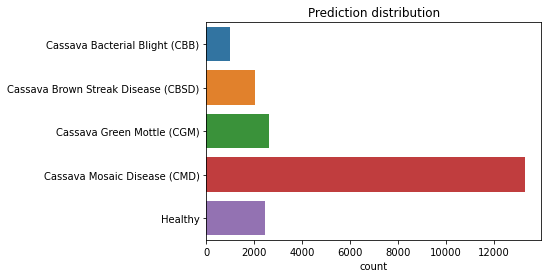

              precision    recall  f1-score   support

           0       0.68      0.63      0.66      1087
           1       0.85      0.80      0.82      2189
           2       0.78      0.85      0.81      2386
           3       0.96      0.97      0.96     13158
           4       0.76      0.72      0.74      2577

    accuracy                           0.89     21397
   macro avg       0.81      0.79      0.80     21397
weighted avg       0.89      0.89      0.89     21397



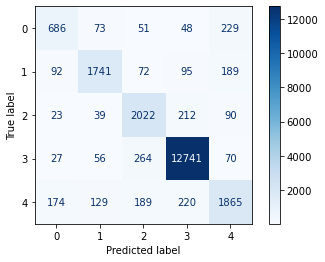

,target,prediction,logit,file_path
0,0,1,0.342028,C:\Users\81908\jupyter_notebook\pytorch_lightn...
1,3,3,0.980566,C:\Users\81908\jupyter_notebook\pytorch_lightn...
2,1,4,0.927038,C:\Users\81908\jupyter_notebook\pytorch_lightn...
3,1,1,0.812347,C:\Users\81908\jupyter_notebook\pytorch_lightn...
4,3,3,0.986403,C:\Users\81908\jupyter_notebook\pytorch_lightn...
...,...,...,...,...
21392,3,3,0.973794,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21393,3,3,0.893387,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21394,1,1,0.899757,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21395,4,4,0.817925,C:\Users\81908\jupyter_notebook\pytorch_lightn...


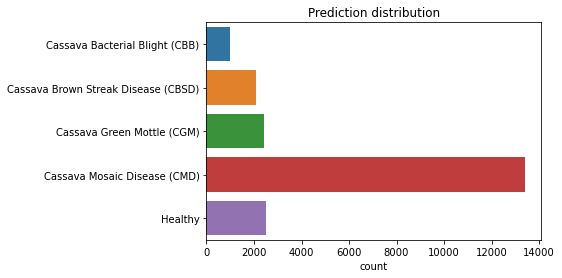

              precision    recall  f1-score   support

           0       0.69      0.62      0.65      1087
           1       0.84      0.81      0.82      2189
           2       0.82      0.83      0.83      2386
           3       0.96      0.97      0.97     13158
           4       0.76      0.73      0.74      2577

    accuracy                           0.89     21397
   macro avg       0.81      0.79      0.80     21397
weighted avg       0.89      0.89      0.89     21397



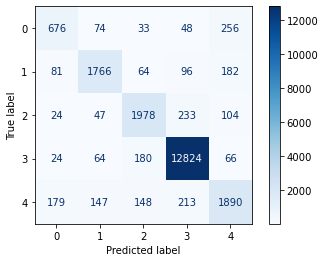

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y_pred = pickle.load(open("Y_pred.pkl", "rb"))
oof_preds_df = pd.DataFrame(
    {
        "target": df["label"],
        "prediction": Y_pred.values.argmax(1),
        "logit": Y_pred.values.max(1),
        "file_path": df["file_path"],
    }
)
oof_preds_df.to_csv("oof_preds_df.csv", index=False)
display(oof_preds_df)

sns.countplot(y=sorted(oof_preds_df["prediction"].map(name_mapping)), orient="v")
plt.title("Prediction distribution")
plt.show()

print(metrics.classification_report(oof_preds_df["target"], oof_preds_df["prediction"]))

cmp = ConfusionMatrixDisplay(
    metrics.confusion_matrix(oof_preds_df["target"], oof_preds_df["prediction"]),
    # display_labels=list(name_mapping.values()),  # 文字被るからやめとく
)
cmp.plot(cmap=plt.cm.Blues)
plt.show()

# ------------------------------------------------------------------------------------

Y_pred_tta = pickle.load(open("Y_pred_tta.pkl", "rb"))
oof_preds_df = pd.DataFrame(
    {
        "target": df["label"],
        "prediction": Y_pred_tta.values.argmax(1),
        "logit": Y_pred_tta.values.max(1),
        "file_path": df["file_path"],
    }
)
oof_preds_df.to_csv("oof_preds_df_tta.csv", index=False)
display(oof_preds_df)


sns.countplot(y=sorted(oof_preds_df["prediction"].map(name_mapping)), orient="v")
plt.title("Prediction distribution")
plt.show()

print(metrics.classification_report(oof_preds_df["target"], oof_preds_df["prediction"]))

cmp = ConfusionMatrixDisplay(
    metrics.confusion_matrix(oof_preds_df["target"], oof_preds_df["prediction"]),
    # display_labels=list(name_mapping.values()),  # 文字被るからやめとく
)
cmp.plot(cmap=plt.cm.Blues)
plt.show()

,target,prediction,logit,file_path
0,0.0,0,0.679423,C:\Users\81908\jupyter_notebook\pytorch_lightn...
1,0.0,0,0.801043,C:\Users\81908\jupyter_notebook\pytorch_lightn...
2,1.0,0,0.734929,C:\Users\81908\jupyter_notebook\pytorch_lightn...
3,0.0,0,0.761746,C:\Users\81908\jupyter_notebook\pytorch_lightn...
4,0.0,0,0.795411,C:\Users\81908\jupyter_notebook\pytorch_lightn...
...,...,...,...,...
21392,0.0,0,0.762947,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21393,0.0,0,0.793983,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21394,0.0,0,0.752932,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21395,0.0,0,0.731924,C:\Users\81908\jupyter_notebook\pytorch_lightn...


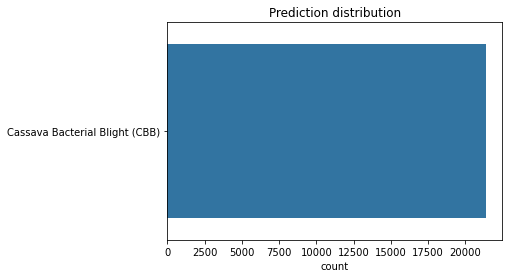

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98     20400
         1.0       0.00      0.00      0.00       997

    accuracy                           0.95     21397
   macro avg       0.48      0.50      0.49     21397
weighted avg       0.91      0.95      0.93     21397



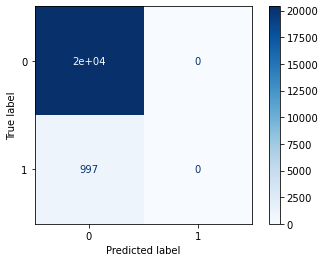

,target,prediction,logit,file_path
0,0.0,0,0.704751,C:\Users\81908\jupyter_notebook\pytorch_lightn...
1,0.0,0,0.786211,C:\Users\81908\jupyter_notebook\pytorch_lightn...
2,1.0,0,0.738329,C:\Users\81908\jupyter_notebook\pytorch_lightn...
3,0.0,0,0.786462,C:\Users\81908\jupyter_notebook\pytorch_lightn...
4,0.0,0,0.790179,C:\Users\81908\jupyter_notebook\pytorch_lightn...
...,...,...,...,...
21392,0.0,0,0.776761,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21393,0.0,0,0.793496,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21394,0.0,0,0.757377,C:\Users\81908\jupyter_notebook\pytorch_lightn...
21395,0.0,0,0.723303,C:\Users\81908\jupyter_notebook\pytorch_lightn...


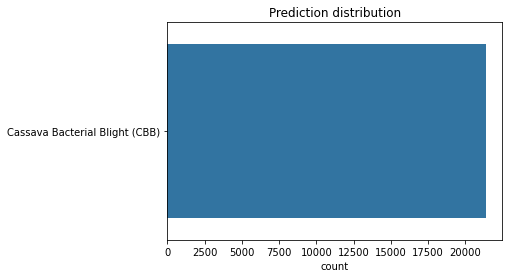

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98     20400
         1.0       0.00      0.00      0.00       997

    accuracy                           0.95     21397
   macro avg       0.48      0.50      0.49     21397
weighted avg       0.91      0.95      0.93     21397



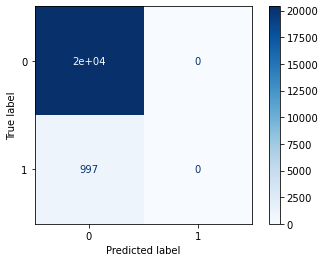

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y_pred = pickle.load(open("Y_pred_noise.pkl", "rb"))
oof_preds_df = pd.DataFrame(
    {
        "target": df["noise"],
        "prediction": Y_pred.values.argmax(1),
        "logit": Y_pred.values.max(1),
        "file_path": df["file_path"],
    }
)
oof_preds_df.to_csv("oof_preds_df_noise.csv", index=False)
display(oof_preds_df)

sns.countplot(y=sorted(oof_preds_df["prediction"].map(name_mapping)), orient="v")
plt.title("Prediction distribution")
plt.show()

print(metrics.classification_report(oof_preds_df["target"], oof_preds_df["prediction"]))

cmp = ConfusionMatrixDisplay(
    metrics.confusion_matrix(oof_preds_df["target"], oof_preds_df["prediction"]),
    # display_labels=list(name_mapping.values()),  # 文字被るからやめとく
)
cmp.plot(cmap=plt.cm.Blues)
plt.show()

# ------------------------------------------------------------------------------------

Y_pred_tta = pickle.load(open("Y_pred_tta_noise.pkl", "rb"))
oof_preds_df = pd.DataFrame(
    {
        "target": df["noise"],
        "prediction": Y_pred_tta.values.argmax(1),
        "logit": Y_pred_tta.values.max(1),
        "file_path": df["file_path"],
    }
)
oof_preds_df.to_csv("oof_preds_df_tta_noise.csv", index=False)
display(oof_preds_df)


sns.countplot(y=sorted(oof_preds_df["prediction"].map(name_mapping)), orient="v")
plt.title("Prediction distribution")
plt.show()

print(metrics.classification_report(oof_preds_df["target"], oof_preds_df["prediction"]))

cmp = ConfusionMatrixDisplay(
    metrics.confusion_matrix(oof_preds_df["target"], oof_preds_df["prediction"]),
    # display_labels=list(name_mapping.values()),  # 文字被るからやめとく
)
cmp.plot(cmap=plt.cm.Blues)
plt.show()

In [28]:
#%load_ext tensorboard
#%tensorboard --logdir ./lightning_logs
#
# https://wandb.ai/anonamename/kaggle_cassava?workspace=user-anonamename